# **Product Review Sentiment Analysis and Rating Prediction** #

This project aims to analyse customer product reviews and predict the sentiment associated with the review text, leveraging Natural Language Processing (NLP) techniques and machine learning models. Sentiment analysis is key for understanding customer feedback and improving product quality, services and user satisfaction. The goal is to identify patterns in the reviews and classify them as positive, neutral or negative while exploring the correlation between review text and ratings.

**Problem Statement**: Given a dataset of product reviews with corresponding ratings, the challenge is to build a machine learning model that can predict the rating based on the review text. This can help companies automatically assess customer satisfaction and make data-driven decisions to improve their products and services. We will explore several models and assess their performance in terms of accuracy, precision and recall.

### **Key Steps in the Project** ###
- Data Collection: Load the dataset containing product reviews and ratings.
- Data Preparation: Clean and preprocess the data to ensure it is suitable for analysis.
- Exploratory Data Analysis (EDA): Understand the data structure, distribution of ratings and word frequencies in the reviews.
- Text Preprocessing: Tokenisation, removing stopwords, stemming/lemmatisation and vectorisation.
- Sentiment Analysis: Use NLP techniques to classify reviews into positive, neutral or negative sentiments.
- Model Selection: Train different machine learning models to predict product ratings.
- Evaluation: Compare model performance using relevant metrics like accuracy, precision and recall.
- Visualisation: Use visual tools to showcase key findings, such as the distribution of sentiment and model predictions.


### **Step 1: Load the Dataset** ###

In [12]:
# Import necessary libraries
import pandas as pd

# Load the dataset, specifying the correct delimiter (comma in this case)
data = pd.read_csv(r"C:\Users\USER\Downloads\Sentiment Analysis for Product Reviews\Amazon Product Review.txt", delimiter=',')

# Display the actual column names in the dataset
print("Columns in the dataset:")
print(data.columns.tolist())

Columns in the dataset:
['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date', 'sentiment']


### **Step 2: Inspect the Dataset for Missing or Inconsistent Values** ###

In [23]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("\nMissing values in each column:")
print(missing_values)

# Define the relevant columns
required_columns = ['review_body', 'star_rating']  

# Check if the required columns exist in the dataset
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")

# Display the first few rows of the relevant columns for verification
print("\nPreview of relevant columns:")
print(data[required_columns].head())


Missing values in each column:
marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline        2
review_body            0
review_date            0
sentiment              0
cleaned_review_body    0
dtype: int64
All required columns are present.

Preview of relevant columns:
                                         review_body  star_rating
0                                      Great love it            5
1  Lots of ads<br />Slow processing speed<br />Oc...            3
2  Excellent unit.  The versatility of this table...            5
3  I bought this on Amazon Prime so I ended up bu...            4
4  All Amazon products continue to meet my expect...            5


### **Step 3: Data Cleaning** ###

In [14]:
# 1. Handle Missing Values
data.dropna(subset=['review_body'], inplace=True)  # Drop rows with missing review_body

# 2. Text Preprocessing
import re

# Function to clean the review text
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags (if needed)
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply the cleaning function to the review_body
data['cleaned_review_body'] = data['review_body'].apply(clean_text)

# Display the first few rows of the cleaned data
print("\nPreview of cleaned review body:")
print(data[['cleaned_review_body', 'star_rating']].head())


Preview of cleaned review body:
                                 cleaned_review_body  star_rating
0                                      great love it            5
1  lots of adsslow processing speedoccasionally s...            3
2  excellent unit  the versatility of this tablet...            5
3  i bought this on amazon prime so i ended up bu...            4
4  all amazon products continue to meet my expect...            5


### **Step 4: Exploratory Data Analysis (EDA)** ###

C:\Users\USER\AppData\Local\Temp\ipykernel_16024\3769336654.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Set2")


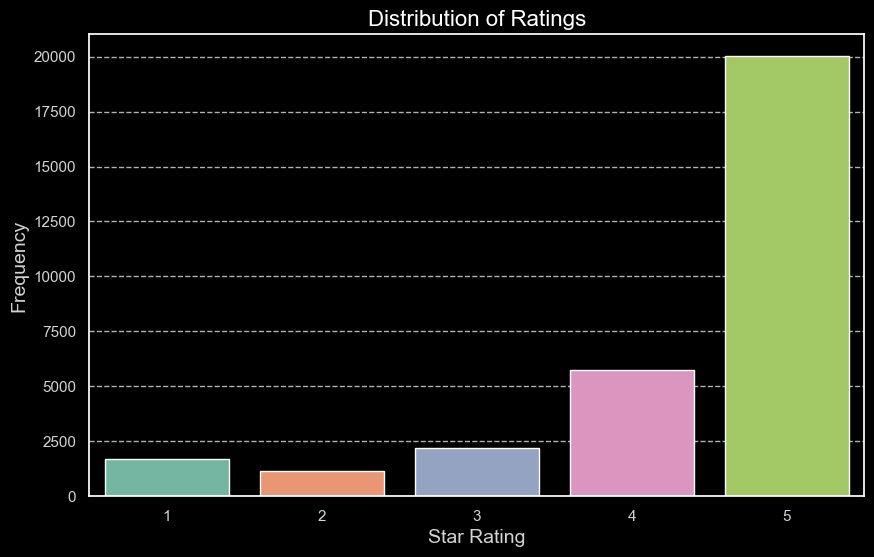

In [36]:
# 1. Explore the Distribution of Ratings

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Set a style with a dark background
plt.style.use('dark_background')

# Count the occurrences of each rating
rating_counts = data['star_rating'].value_counts().sort_index()

# Plot the distribution of ratings with vibrant colors
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Set2")
plt.title('Distribution of Ratings', fontsize=16, color='white')
plt.xlabel('Star Rating', fontsize=14, color='lightgray')
plt.ylabel('Frequency', fontsize=14, color='lightgray')
plt.xticks(rotation=0, color='lightgray')
plt.yticks(color='lightgray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16024\2807451949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='star_rating', data=data, palette="coolwarm")


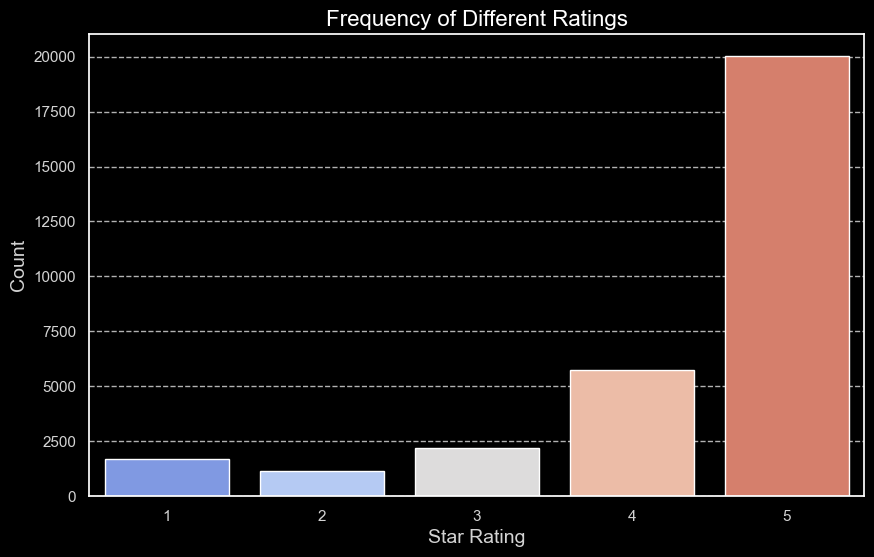

In [37]:
# 2. Visualise the Frequency of Different Ratings

plt.figure(figsize=(10, 6))
sns.countplot(x='star_rating', data=data, palette="coolwarm")
plt.title('Frequency of Different Ratings', fontsize=16, color='white')
plt.xlabel('Star Rating', fontsize=14, color='lightgray')
plt.ylabel('Count', fontsize=14, color='lightgray')
plt.xticks(rotation=0, color='lightgray')
plt.yticks(color='lightgray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='star_rating', ylabel='count'>

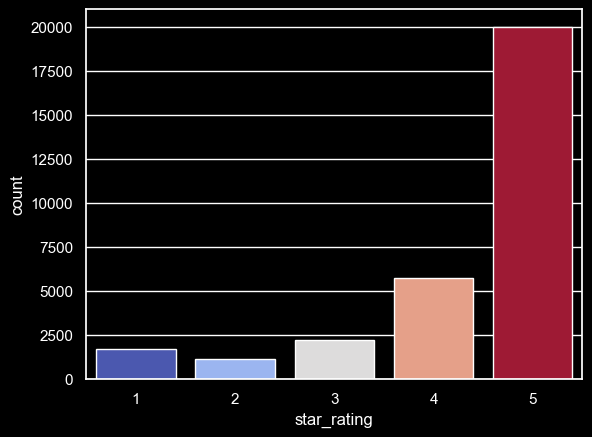

In [38]:
sns.countplot(x='star_rating', data=data, palette="coolwarm", hue='star_rating', legend=False)

In [39]:
# Combine all cleaned reviews into a single string
all_reviews = ' '.join(data['cleaned_review_body'])

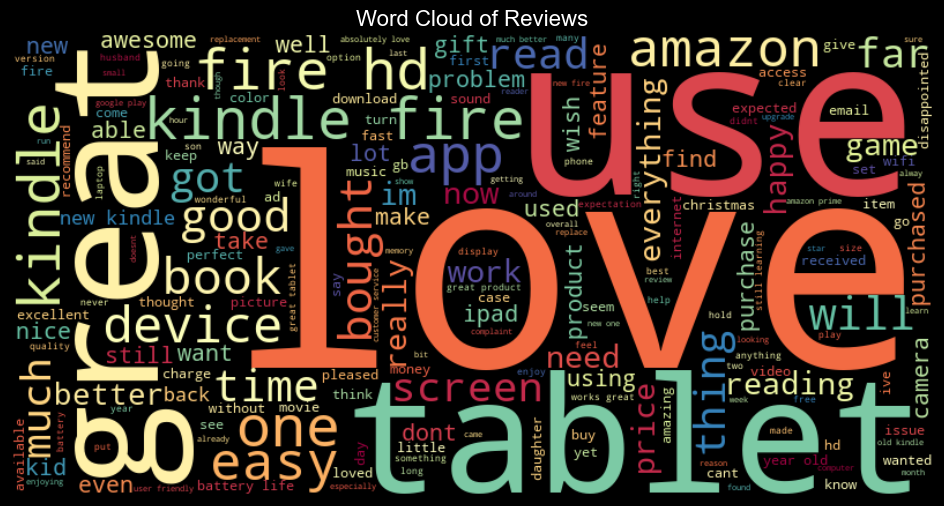

In [40]:
# 3. Perform Basic Text Analysis - Word Cloud

# Combine all cleaned reviews into a single string
all_reviews = ' '.join(data['cleaned_review_body'])

# Generate a word cloud with a unique color scheme
wordcloud = WordCloud(width=800, height=400, background_color='black', 
                      colormap='Spectral', contour_color='white', 
                      contour_width=1).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Reviews', fontsize=16, color='white')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16024\2238351074.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='magma')


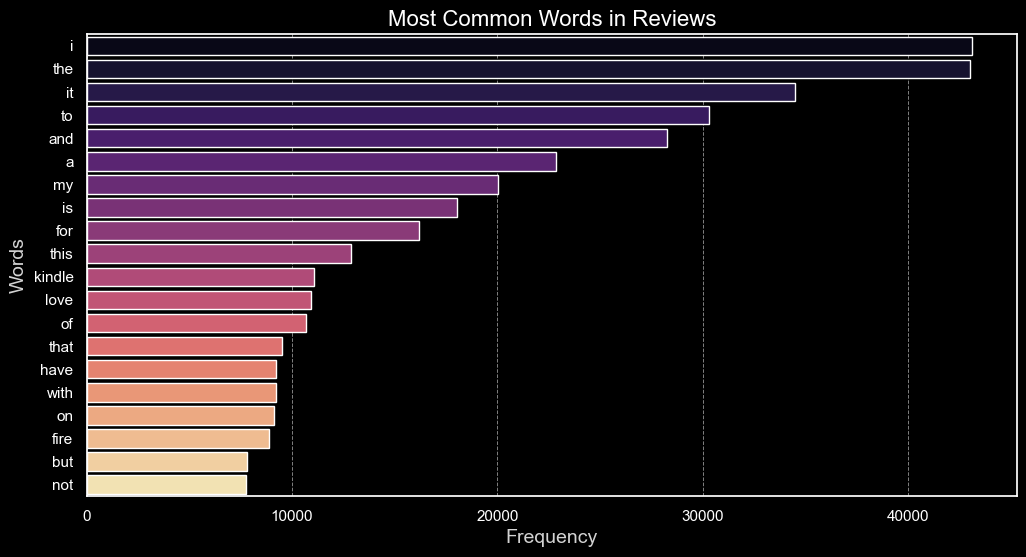

In [41]:
# Most Common Words

# Tokenise the cleaned review body
all_words = ' '.join(data['cleaned_review_body']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words (e.g., top 20)
most_common_words = word_counts.most_common(20)

# Create a DataFrame from the most common words
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the most common words with a vibrant color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='magma')
plt.title('Most Common Words in Reviews', fontsize=16, color='white')
plt.xlabel('Frequency', fontsize=14, color='lightgray')
plt.ylabel('Words', fontsize=14, color='lightgray')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
plt.show()

### **Step 4: Sentiment Analysis Preparation** ###

In [16]:
import sklearn
print(sklearn.__version__)

1.5.2


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X = vectorizer.fit_transform(data['cleaned_review_body'])

# 2. Prepare target variable
y = data['star_rating']

# 3. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (24673, 5000)
Testing data shape: (6169, 5000)


### **Step 5: Train a Model** ###

In [18]:
from sklearn.linear_model import LogisticRegression

# Initialise the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score

# Print the accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 72.91%
              precision    recall  f1-score   support

           1       0.56      0.52      0.54       327
           2       0.35      0.08      0.13       219
           3       0.36      0.25      0.29       410
           4       0.51      0.34      0.41      1193
           5       0.80      0.95      0.87      4020

    accuracy                           0.73      6169
   macro avg       0.51      0.43      0.45      6169
weighted avg       0.69      0.73      0.70      6169



### **Step 6: Evaluating the Model and Making Predictions** ###

In [19]:
# 1. Evaluate Model Performance on the Test Data

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model on the test set
predictions = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Display confusion matrix for a visual understanding of the model's performance
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

Model Accuracy: 72.91%

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.52      0.54       327
           2       0.35      0.08      0.13       219
           3       0.36      0.25      0.29       410
           4       0.51      0.34      0.41      1193
           5       0.80      0.95      0.87      4020

    accuracy                           0.73      6169
   macro avg       0.51      0.43      0.45      6169
weighted avg       0.69      0.73      0.70      6169


Confusion Matrix:
[[ 171   13   39   32   72]
 [  56   17   64   35   47]
 [  40   14  102  135  119]
 [  23    4   68  402  696]
 [  18    1   12  183 3806]]


In [20]:
# 2. Test the Model with New Review Texts

# Define a new review
new_reviews = ["The product was amazing and worked perfectly!", 
               "Terrible experience, the product broke after two days!", 
               "It's okay, not the best, but does the job."]

# Convert the new review to the same format as the training data (vectorized form)
new_reviews_vectorized = vectorizer.transform(new_reviews)

# Use the trained model to predict the sentiments
predictions = model.predict(new_reviews_vectorized)

# Map the predicted ratings to sentiments (optional)
rating_to_sentiment = {1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'}
predicted_sentiments = [rating_to_sentiment[rating] for rating in predictions]

# Display the results
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: The product was amazing and worked perfectly!
Predicted Sentiment: Very Positive

Review: Terrible experience, the product broke after two days!
Predicted Sentiment: Very Negative

Review: It's okay, not the best, but does the job.
Predicted Sentiment: Neutral



In [21]:
# 3. Save the Trained Model

import joblib

# Save the model to a file
joblib.dump(model, 'sentiment_analysis_model.pkl')

# Save the vectorizer as well (since it's needed to process new data)
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [22]:
# Load the model and vectorizer
model = joblib.load('sentiment_analysis_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')